# Pengenalan Pola

## Tugas 2: Klasifikasi Gambar

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas2_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Untuk kelancaran Anda, gunakan Python 3 dalam tugas ini. Selain itu, terdapat beberapa _packages_ yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scikit-learn
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**Nilai akhir: XX/70**

### Deskripsi Dataset

Dataset hewan merupakan hasil "gambar tangan" beberapa orang melalui internet. Dataset untuk tugas ini diambil dari [The Quick Draw Dataset](https://github.com/googlecreativelab/quickdraw-dataset) yang dikumpulkan oleh Google. Dataset ini terdiri dari 50 juta gambar yang terdiri dari 345 kategori.

Untuk menyederhanakan tugas Anda, hanya subset dari dataset hewan yang diambil, yaitu sejumlah gambar dari 4 kategori hewan: **cat**, **crab**, **dog**, dan **dolphin**. Anda akan mengeksplorasi beberapa algoritma pembelajaran mesin yang dapat digunakan untuk mengklasifikasi gambar-gambar tersebut. Selain itu, Anda juga akan membuat beberapa visualisasi dari beberapa sampel gambar dalam dataset.

### Mengimpor Modul dan Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
X = np.load('../datasets/quickdraw.npy')
y = np.load('../datasets/quickdraw_labels.npy').astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Eksplorasi Awal Data (15 poin)

### Soal 1.1 (4 poin)

Tampilkan 5 gambar sampel dari masing-masing kelas dalam `X_train` secara acak, lalu buatlah dalam bentuk grid berukuran 4 x 5!

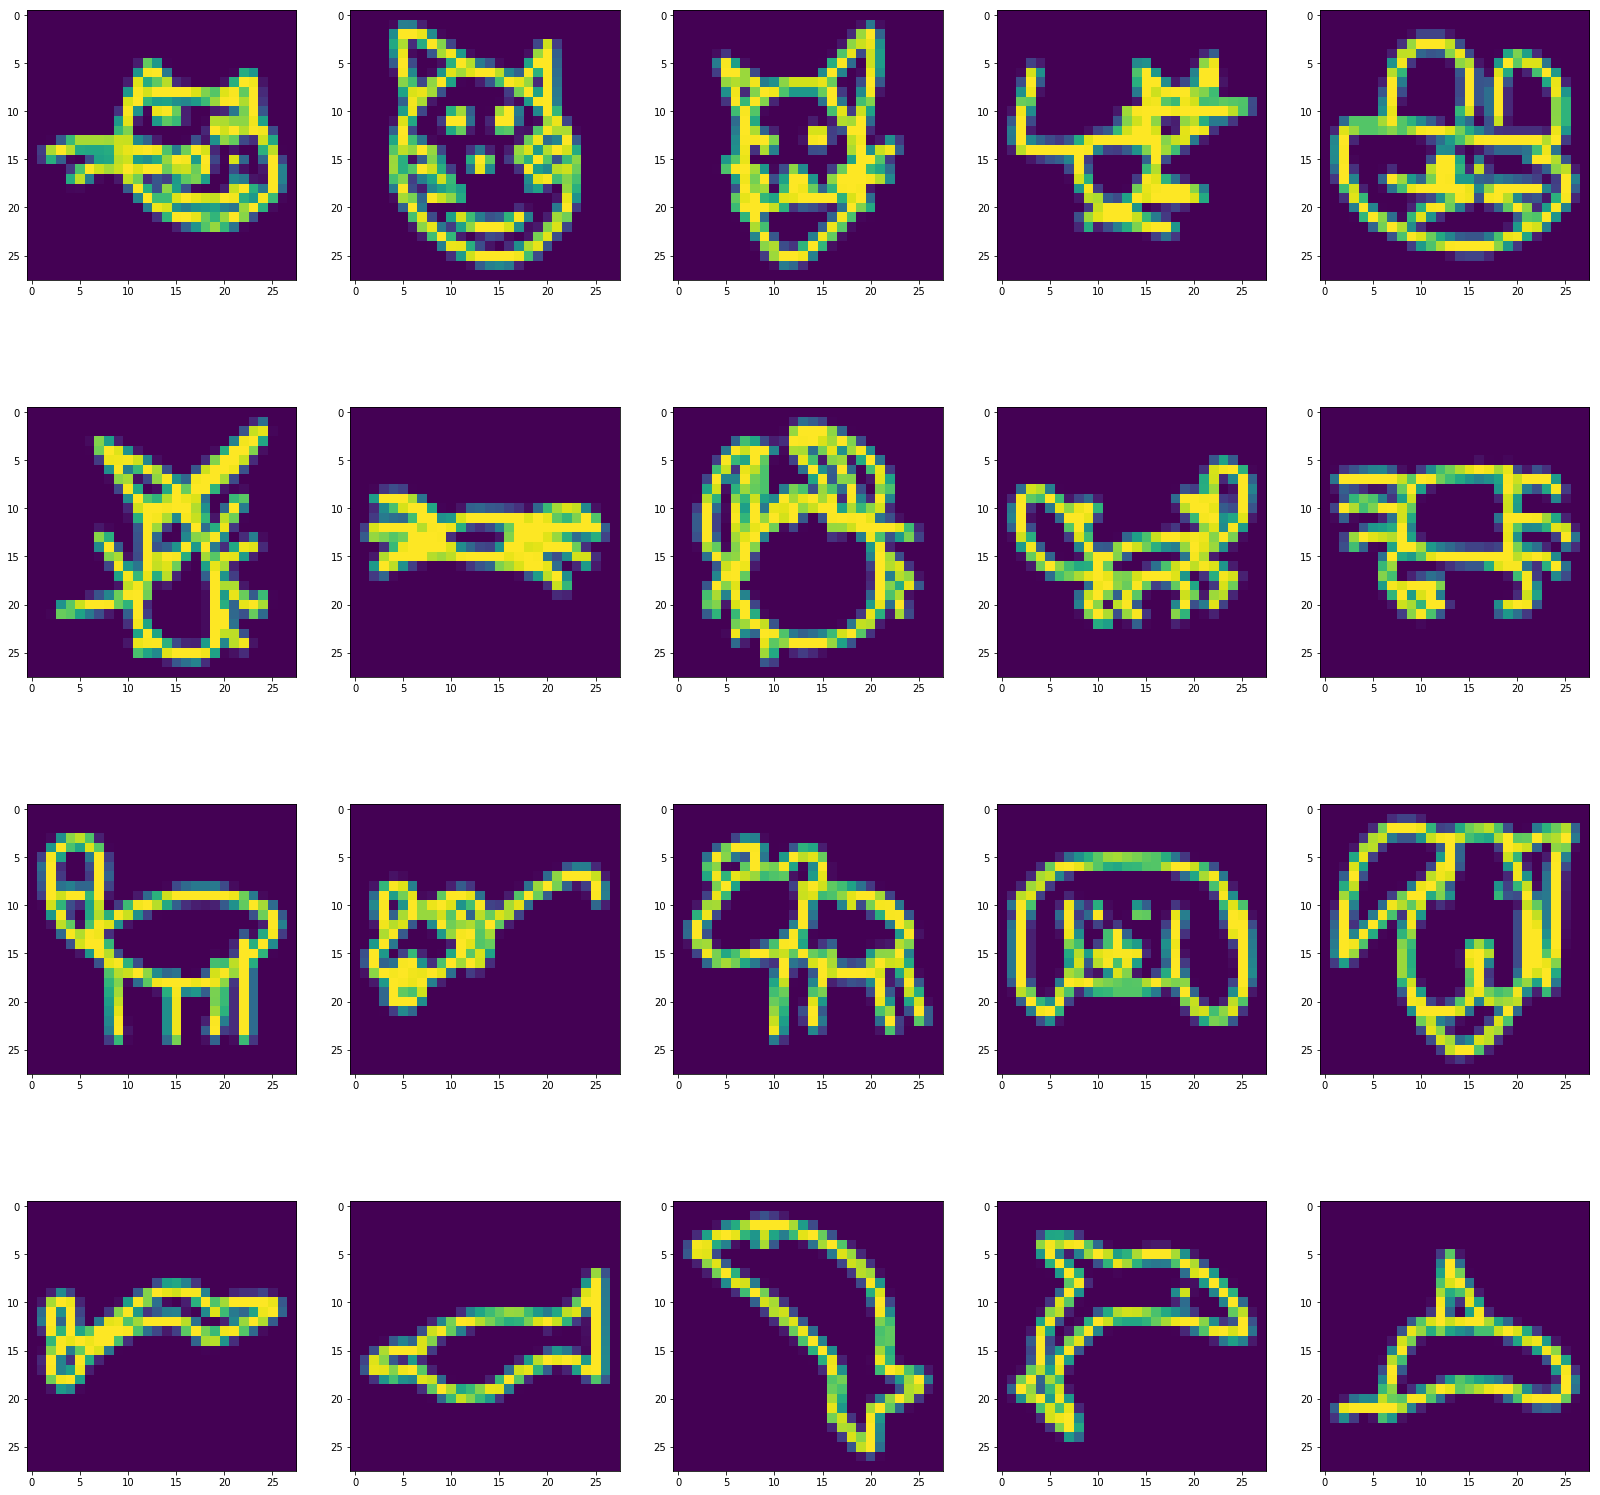

In [4]:
li=np.unique(y_train)
imgs=[]
for i in range(4):
    l=li[i]
    for j in range(5):
        n=np.random.randint(0, len(y_train))
        while (y_train[n]!=l or n in imgs):
            n=np.random.randint(0, len(y_train))
        imgs+=[n]

fig = plt.figure(figsize=(28,28))
columns = 5
rows = 4
for i in range(1, (columns*rows )+ 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[imgs[i-1]].reshape(28,28))
    
plt.show()

### Soal 1.2.a (4 poin)

Gambarkan histogram nilai pixel di posisi (0,0), i.e. pojok kiri atas, dan (15,15) dari data `X_train` dalam dua plot yang berbeda. Batasi sumbu x untuk bernilai $x \in [0, 1]$. Bagi nilai tiap pixel dengan 255 terlebih dahulu.

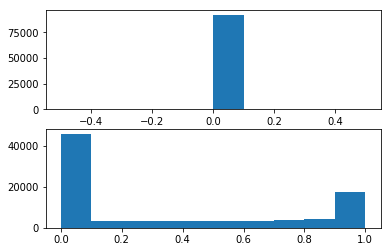

In [5]:
X_train_reshaped=X_train.reshape(len(X_train), 28, 28)

p0_0=[]
p15_15=[]
for i in X_train_reshaped:
    p0_0+=[i[0][0]]
    p15_15+=[i[15][15]]
    
p0_0=np.array(p0_0)
p15_15=np.array(p15_15)

plt.subplot(211)
plt.hist(p0_0/255)
plt.subplot(212)
plt.hist(p15_15/255)
plt.show()

### Soal 1.2.b (2 poin)

Apa yang dapat Anda simpulkan dari kedua histogram tersebut?

Pixel pada posisi (0,0) most likely nilainya selalu 0 apapun labelnya, sehingga sebaiknya tidak digunakan untuk melakukan klasifikasi. Pixel pada posisi (15,15) memiliki keragaman nilai, biarpun tetap banyak nilai 0 nya. Pixel pada posisi (15,15) bisa berpengaruh pada pembuatan model klasifikasi.

### Soal 1.3 (2 poin)

Berapa jumlah data untuk masing-masing kelas dalam data latih dan data uji?

In [6]:
y_train_unique, y_train_unique_counts = np.unique(y_train, return_counts=True)
y_test_unique, y_test_unique_counts = np.unique(y_test, return_counts=True)


print('Data latih:')
for i in range(len(y_train_unique)):
    print(y_train_unique[i], ' = ', y_train_unique_counts[i])

print('Data uji:')
for i in range(len(y_test_unique)):
    print(y_test_unique[i], ' = ', y_test_unique_counts[i])

Data latih:
cat  =  21582
crab  =  22269
dog  =  26468
dolphin  =  21362
Data uji:
cat  =  9218
crab  =  9463
dog  =  11571
dolphin  =  9041


## 2. Klasifikasi dengan Naive Bayes (25 poin)

### Soal 2.1.a (1 poin)

Ubah nilai pixel dalam `X_train` dan `X_test` dengan membaginya dengan 255.

In [7]:
X_train1=X_train/255
X_test1=X_test/255

### Soal 2.1.b (2 poin)

Ubah nilai `y_train` dan `y_test` menggunakan `LabelEncoder` agar menjadi $\in \{1,2,3,4\}$.

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(np.unique(y_train))

y_train1=le.transform(y_train)+1
y_test1=le.transform(y_test)+1

### Soal 2.2 (5 poin)

Dengan modul `GaussianNB`, klasifikasikan `X_test` dari `X_train`, laporkan akurasinya dan gambarkan *heatmap* dari *confusion matrix*-nya! Jangan lupa untuk memberikan label untuk masing-masing sumbunya dan menganotasi tiap kotak pada *heatmap*!

Pada proses pelatihan model (`clf.fit()`), tambahkan `%timeit -n1` pada baris yang sama sehingga menjadi `%timeit -n1 clf.fit()`. Ini akan menunjukkan waktu yang dibutuhkan untuk melatih model tersebut.

1.8 s ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Accuracy =  0.45547552999261953


Text(33,0.5,'y_pred')

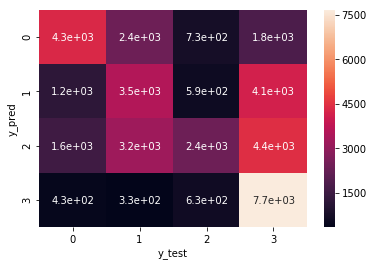

In [9]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
%timeit -n1 gnb.fit(X_train1, y_train1)

y_pred1 = gnb.predict(X_test1)
print('Accuracy = ', accuracy_score(y_test1, y_pred1))

h=sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True)
h.set_xlabel('y_test')
h.set_ylabel('y_pred')

### Soal 2.3 (3 poin)

Terapkan PCA pada `X_train`. Gunakan semua dimensi yang dihasilkan dari metode PCA, lalu plot persentase kumulatif variansi yang dijelaskan untuk setiap penambahan *principal component*. Berikan garis putus-putus horizontal untuk menandai saat persentase kumulatifnya mencapai 90%. Catat waktu yang dibutuhkan untuk proses transformasi `X_train` dengan PCA dengan `%timeit -n1`.

*Petunjuk: Gunakan `.fit()` dari modul `PCA` dan baca dokumentasinya untuk tahu lebih lengkap cara pemakaiannya!*

10.7 s ± 1.44 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0,0.5,'cumulative explained variance')

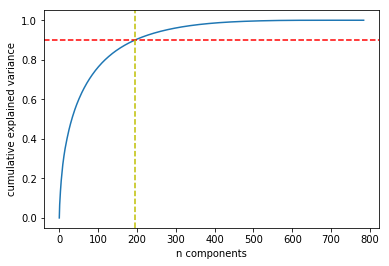

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
%timeit -n1 pca.fit(X_train1)

evr=pca.explained_variance_ratio_

pk=0
n=0
n1=0
x=[0]
y=[0]
while n1<784:
    if pk<0.9: n+=1
    pk+=np.max(evr)
    y+=[pk]
    n1+=1
    x+=[n1]
    evr[np.argmax(evr)]*=-1

evr[(evr<0)]*=-1

plt.plot(x,y)
plt.axhline(.90, linestyle='--', c='r')
plt.axvline(n, linestyle='--', c='y')
plt.xlabel('n components')
plt.ylabel('cumulative explained variance')

### Soal 2.4.a (5 poin)

Dari soal sebelumnya, Anda mungkin akan memperhatikan bahwa 90% variansi dapat dijelaskan dengan 200 komponen prinsipil. Transformasikan data dengan PCA dan ambil 200 komponen saja kali ini.

Latih kembali model Naive Bayes Anda dengan kode seperti yang telah Anda buat di soal 2.2 dan prediksi label `X_test` yang telah diubah dengan PCA! Apakah Anda menemukan perbedaan waktu dan akurasi dengan soal 2.2?

In [11]:
pca=PCA(n)
X_train1_pca=pca.fit_transform(X_train1)
X_test1_pca=pca.fit_transform(X_test1)

%timeit -n1 gnb.fit(X_train1_pca, y_train1)

y_pred1 = gnb.predict(X_test1_pca)
print('Accuracy = ', accuracy_score(y_test1, y_pred1))

414 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Accuracy =  0.5091492123278956


### Soal 2.4.b (2 poin)

Apa yang menyebabkan perbedaan waktu dan akurasi dari model Naive Bayes sebelum dan setelah menggunakan PCA?

Waktu proses latih data setelah PCA lebih cepat dibandingkan sebelumnya. Hal ini disebabkan oleh pemrosesan feature nya yang lebih sedikit (sebelum PCA melatih data dilakukan pada 784 features, sedangkan setelah PCA feature yang digunakan tidak lebih dari 200). Score akurasi juga bertambah dikarenakan features yang digunakan adalah features yang paling "menjelaskan" variansnya.

### Soal 2.5 (2 poin)

Lakukan PCA kembali untuk menghasilkan 2 komponen prinsipil saja dari `X_train`. Lalu, visualisasikan hasil transformasi tersebut dalam *scatter plot* yang dibedakan warnanya berdasarkan kelas dalam `y_train`!

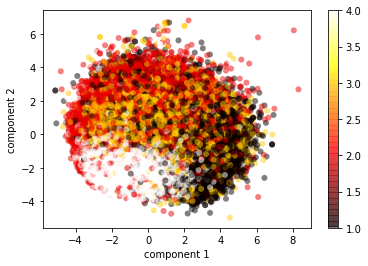

In [12]:
pca=PCA(2)
X_train2_pca=pca.fit_transform(X_train1)

plt.scatter(X_train2_pca[:, 0], X_train2_pca[:, 1],
            c=y_train1, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('hot'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Soal 2.6 (5 poin)

Berikan kesimpulan sementara Anda dari eksplorasi dengan PCA dan Naive Bayes ini.

Asumsi Naive Bayes adalah setiap feature/atribut yang ada adalah conditional independence, sehingga ketika melatih model klasifikasi akan digunakan seluruh atributnya karena dianggap setiap atribut akan berpengaruh pada model. Hal ini menyebabkan proses latih data menjadi lama (karena data yang diproses banyak) dan kurang akurat (karena banyak dari data yang digunakan mungkin memang sedikit atau tidak berpengaruh pada modelnya, contoh: pixel pada posisi (0,0) yang kemungkinan besar bernilai 0 pada gambar apapun).
PCA digunakan untuk mengubah dimensi data yang akan digunakan untuk melatih dan menguji model. Dengan menggunakan PCA bisa didapatkan nilai tingkat berpengaruhnya suatu features terhadap model data latihnya. Karena banyak features yang memang sedikit atau tidak berpengaruh terhadap hasil latih model, maka jumlah features yang akan digunakan untuk melatih dan menguji model akan berpengaruh secara signifikan (contohnya pada kasus ini dari 784 menjadi kurang dari 200). Hal ini juga akan berpengaruh terhadap waktu lati data model dan akurasi dari hasil uji modelnya.

## 3. Model Linear (30 poin)

### Soal 3.1.a (3 poin)

Klasifikasikan data `X_test` dengan melatih model regresi logistik dari `X_train`. Gunakan parameter bawaan dari pustakanya. Laporkan akurasi dan *confusion matrix*-nya.

Accuracy =  0.6994884585040593


Text(33,0.5,'y_pred')

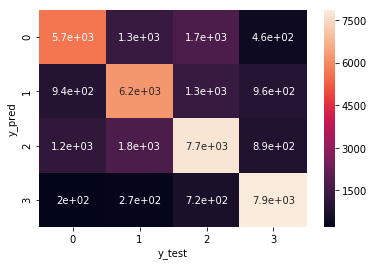

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train1, y_train1)

y_pred1=lr.predict(X_test1)
print('Accuracy = ', accuracy_score(y_test1, y_pred1))

h=sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True)
h.set_xlabel('y_test')
h.set_ylabel('y_pred')

### Soal 3.1.b (2 poin)

Gambarkan nilai dari koefisien yang membentuk masing-masing kelas dalam bentuk line plot. Dengan demikian, seharusnya Anda akan punya 4 line plots.

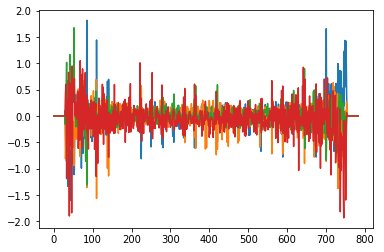

In [14]:
for i in range(4):
    plt.plot(lr.coef_[i])

### Soal 3.2.a (2 poin)

Klasifikasikan kembali data, tapi kali ini ubah nilai parameter `C` menjadi 0.01. Laporkan kembali akurasi dan *confusion matrix*-nya.

Accuracy =  0.6962308808184664


Text(33,0.5,'y_pred')

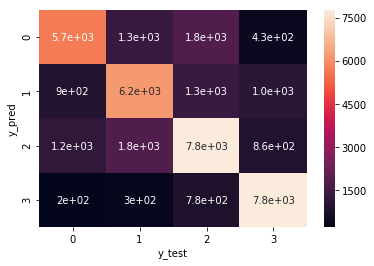

In [15]:
lr = LogisticRegression(C=0.01)
lr.fit(X_train1, y_train1)

y_pred1=lr.predict(X_test1)
print('Accuracy = ', accuracy_score(y_test1, y_pred1))

h=sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True)
h.set_xlabel('y_test')
h.set_ylabel('y_pred')

### Soal 3.2.b (3 poin)

Gambarkan kembali koefisien dari modelnya seperti pada soal 3.1.b. Apa yang dapat Anda perhatikan?

*Petunjuk: Perhatikan skala gambarnya!*

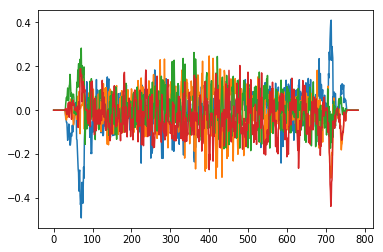

In [16]:
for i in range(4):
    plt.plot(lr.coef_[i])

Skalanya lebih keci, karena pada 3.2b telah dilakukan regularisasi

### Soal 3.3 (5 poin)

Terapkan PCA pada data dan ambil 200 komponen prinsipil pertama. Klasifikasikan kembali dengan model regresi logistik. Laporkan akurasi dan gambarkan *heatmap* dari *confusion matrix*-nya. Apakah hasil klasifikasinya menjadi lebih baik? Mengapa?

Accuracy =  0.5876873743414858


Text(33,0.5,'y_pred')

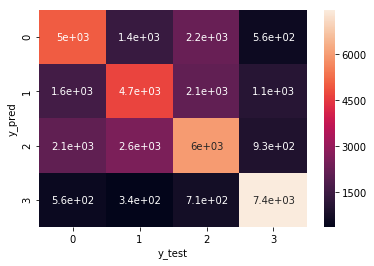

In [17]:
pca=PCA(n)
X_train1_pca=pca.fit_transform(X_train1)
X_test1_pca=pca.fit_transform(X_test1)

lr=LogisticRegression()

lr.fit(X_train1_pca, y_train1)

y_pred1 = lr.predict(X_test1_pca)
print('Accuracy = ', accuracy_score(y_test1, y_pred1))

h=sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True)
h.set_xlabel('y_test')
h.set_ylabel('y_pred')

Karena ketika PCA digunakan untuk mengurangi dimensi sebenarnya sama dengan membuang informasi-informasi yang ada pada dataset. Hal ini menyebabkan proses latih data menggunakan data yang ditransformasi dengan PCA bisa memperbaiki modelnya, tetapi bisa juga merusak modelnya.

### Soal 3.4.a (4 poin)

Kita akan mengevaluasi lebih jauh mengenai efek regularisasi. Lakukan klasifikasi dengan regresi logistik pada `X_train_pca` dan `X_test_pca` dengan nilai $C = \{10^x|-2 \leq x \leq 6, x \in \mathbb{Z}\}$. Plot hasilnya dengan menggunakan sumbu x berbasis $\log_{10} C$.

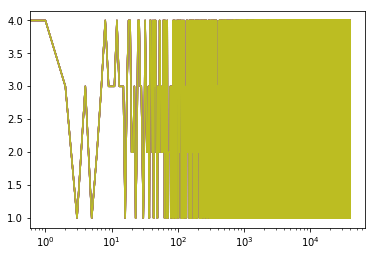

In [18]:
for i in range(-2, 7):
    lr = LogisticRegression(C=10**i)
    
    lr.fit(X_train1_pca, y_train1)
    y_pred1 = lr.predict(X_test1_pca)
    plt.xscale('log')
    
    plt.plot(y_pred1)

### Soal 3.4.b (3 poin)

Buatlah *pipeline* dengan menggunakan transformasi Gaussian seperti yang dicontohkan di [sini](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Gaussian-basis-functions). Gunakan nilai fitur [2, 4, 8, 16, 32]. Gambarkan plotnya seperti pada soal 3.4.a. Apa yang dapat Anda perhatikan?

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

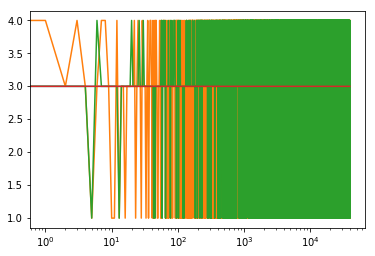

In [23]:
from sklearn.pipeline import make_pipeline

for i in range(1,5):
    gauss_model = make_pipeline(GaussianFeatures(2**i),
                                LogisticRegression())
    gauss_model.fit(X_train1_pca, y_train1)
    yfit = gauss_model.predict(X_test1_pca)

    plt.xscale('log')
    plt.plot(yfit)

### Soal 3.4.c (5 poin)

Apa yang menjadi masalah pada hasil soal 3.4.a dan 3.4.b? Apa yang mungkin dapat dilakukan untuk memperbaiki akurasi dari modelnya? Lakukan eksplorasi tambahan jika diperlukan!

Accuracy =  0.7002010536227827


Text(33,0.5,'y_pred')

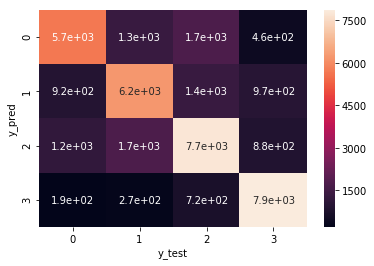

In [26]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train1, y_train1)

y_pred1=lr.predict(X_test1)
print('Accuracy = ', accuracy_score(y_test1, y_pred1))

h=sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True)
h.set_xlabel('y_test')
h.set_ylabel('y_pred')

Biarpun akurasi yang didapat lebih baik, saya belum yakin apa yang sebenarnya saya lakukan ketika mengubah nilai C pada logistic regression.

### Soal 3.5 (3 poin)

Berikan kesimpulan Anda dari hasil eksplorasi Anda dalam tugas ini.

Penggunaan PCA tidak selalu memperbaiki akurasi model yang dibuat. Karena PCA hanya mengurangi nilai variansi dari datanya. Penggunaan PCA seharusnya bisa mempersingkat waktu melakukan proses melatih modelnya, karena PCA mereduksi jumlah feature yang akan digunakan pada proses pelatihan model.